Importing libraries

In [52]:
import pandas as pd # for reading and preporcessing the data
from sklearn.model_selection import train_test_split # to split the data set into training and testing
from sklearn.linear_model import LogisticRegression  # A type of supervised learning algorithms that uses regression to predict a class , same as classification but with numbers instead of
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, precision_score, recall_score, fbeta_score
from sklearn.preprocessing import StandardScaler,LabelEncoder # to encode categories into numbers and to standardizes features
import matplotlib.pyplot as plt # to plot graphs
import seaborn as sns

Dataset Description

In [82]:
from IPython.display import HTML

# Define the HTML table as a string
html_table = '''
<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of family members</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in days)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: bad credit history, 1: good credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>
'''

# Display the HTML table
display(HTML(html_table))

Variable Name,Description,Sample Data
Loan_ID,Loan reference number (unique ID),LP001002; LP001003; ...
Gender,Applicant gender (Male or Female),Male; Female
Married,Applicant marital status (Married or not married),Married; Not Married
Dependents,Number of family members,0; 1; 2; 3+
Education,Applicant education/qualification (graduate or not graduate),Graduate; Under Graduate
Self_Employed,"Applicant employment status (yes for self-employed, no for employed/others)",Yes; No
ApplicantIncome,Applicant's monthly salary/income,5849; 4583; ...
CoapplicantIncome,Additional applicant's monthly salary/income,1508; 2358; ...
LoanAmount,Loan amount,128; 66; ...
Loan_Amount_Term,The loan's repayment period (in days),360; 120; ...


Data Collection and Processing


In [53]:
#loading the data set into a pandas DataFrame
loan_dataset = pd.read_csv('dataset.csv')


In [54]:
#Sample of the data set
loan_dataset.head() #prints the first 5 rows of the data set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
#number of rows and cols
loan_dataset.shape

(614, 13)

In [56]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [57]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [59]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [60]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\co.magic\AppData\Local\Temp\ipykernel_25464\474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [61]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [62]:
# Handle 'Dependents' column (replace '3+' with 3 and convert to integer)
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace('3+', 3).astype(int)

In [63]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

In [64]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    loan_dataset[col] = label_encoder.fit_transform(loan_dataset[col])

In [65]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [66]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status','Gender'],axis=1)
Y = loan_dataset['Loan_Status']

In [67]:
print(X)
print(Y)

     Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1          1           1          0              0             4583   
2          1           0          0              1             3000   
3          1           0          1              0             2583   
4          0           0          0              0             6000   
5          1           2          0              1             5417   
..       ...         ...        ...            ...              ...   
609        0           0          0              0             2900   
610        1           3          0              0             4106   
611        1           1          0              0             8072   
612        1           2          0              0             7583   
613        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2  

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

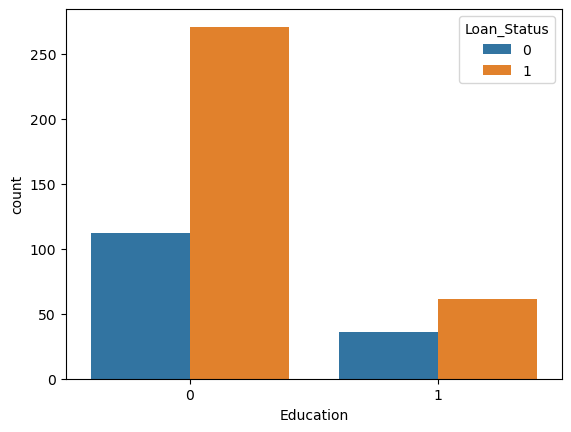

In [68]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

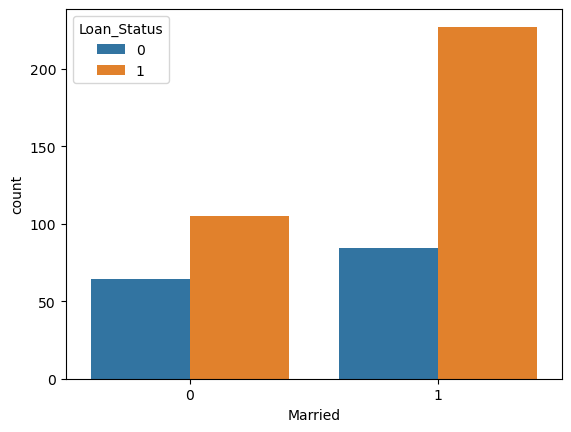

In [69]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

Train Test Split

In [70]:
#Split the data into training and testing (65-35)
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,stratify=Y,random_state=20)  

In [71]:
print(X.shape, X_train.shape, X_test.shape)

(480, 10) (312, 10) (168, 10)


Training the model:

Logistic Regression Model

In [72]:
#A preprocessing step that is used to standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
# Initialize PCA with desired number of components
pca = PCA(n_components=5)  # Choose the number of components

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [73]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [84]:
import numpy as np
import pandas as pd

# Get absolute values of coefficients
lr_importance = np.abs(model.coef_[0])

# If X is a DataFrame, get column names
feature_names = X.columns

# Create DataFrame to show feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lr_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)


             Feature  Importance
8     Credit_History    1.045759
0            Married    0.364778
6         LoanAmount    0.264412
2          Education    0.212907
3      Self_Employed    0.092894
5  CoapplicantIncome    0.089229
7   Loan_Amount_Term    0.077327
1         Dependents    0.040663
9      Property_Area    0.013570
4    ApplicantIncome    0.004122


Prediction and Evaluation

In [74]:
# accuracy score on training data
X_train_prediction = model.predict(X_train_scaled)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [75]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7948717948717948


In [76]:
# accuracy score on training data
X_test_prediction = model.predict(X_test_scaled)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [77]:
# print the test accuracy
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8392857142857143


In [78]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Additional metrics
precision = precision_score(Y_test, y_pred, average='weighted')  # or 'macro', 'micro', 'binary'
recall = recall_score(Y_test, y_pred, average='weighted')
f2_score = fbeta_score(Y_test, y_pred, beta=2, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F2 Score: {f2_score:.2f}")


Accuracy: 0.8392857142857143
Confusion Matrix:
 [[ 25  27]
 [  0 116]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        52
           1       0.81      1.00      0.90       116

    accuracy                           0.84       168
   macro avg       0.91      0.74      0.77       168
weighted avg       0.87      0.84      0.82       168

Precision: 0.87
Recall: 0.84
F2 Score: 0.83


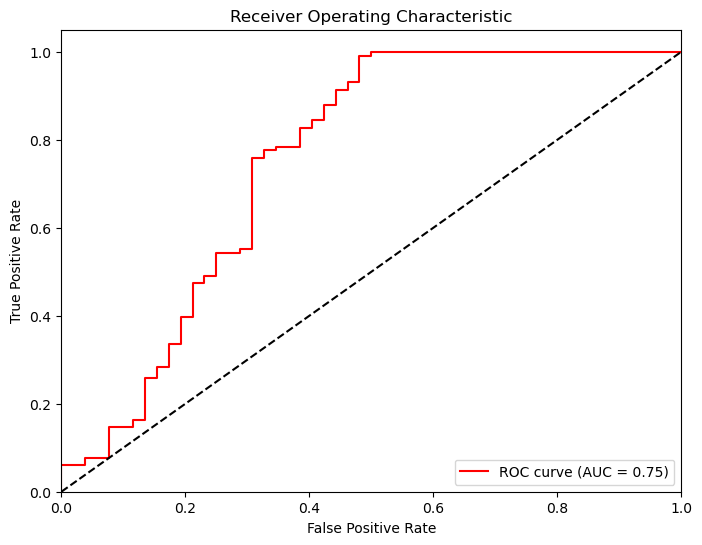

In [79]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

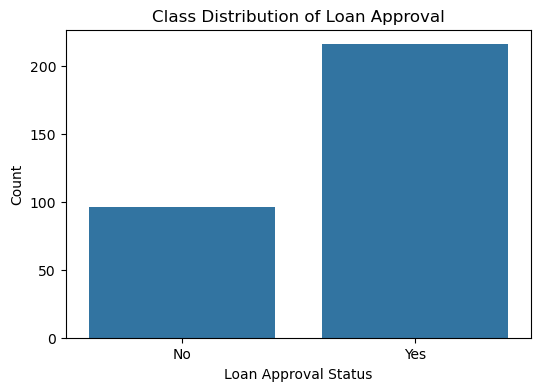

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train contains loan approval status (e.g., 0: No, 1: Yes)
class_counts = pd.Series(Y_train).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.title('Class Distribution of Loan Approval')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Data Seralization

In [81]:
import pickle

# Save the model so it could be used in the web app
pickle.dump(model, open("models/logistic.pkl", "wb"))

In [85]:
import json
metrics = {
    "model_name": "SVM",
    "metrics": {
        "accuracy": accuracy_score(Y_test, y_pred),
        "precision": precision,
        "recall": recall,
        "f1_score": f2_score,
        "confusion_matrix": confusion_matrix(Y_test, y_pred).tolist()
    }
}

with open('Logistic_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)